# 🩺 Indian Liver Patient Data Analysis

# This Jupyter Notebook is part of the internship final task, adapted from Task 04 requirements.
# Our goal: analyze the dataset, clean it, perform domain-specific analysis, and visualize key patterns.

 Topics we will cover:
 1. Demographics of patients (age, gender distribution)
 2. Liver function indicators (biochemical parameters)
 3. Patterns related to patient conditions
 4. Correlation between attributes and liver disease status
 5. Data cleaning, preprocessing, and exploratory data analysis
 6. Insights & recommendations

print("📄 Notebook initialized for Indian Liver Patient Dataset Analysis")

In [5]:
# 1️⃣ Importing Required Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For cleaner plots
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

print("✅ Libraries imported successfully")

✅ Libraries imported successfully


In [7]:
# 2️⃣ Load the Dataset

file_path = "Indian Liver Patient Dataset (ILPD).csv"
df = pd.read_csv(file_path)

In [9]:
# Display first 5 rows
df.head()

,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.9,1
0,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
1,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
2,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
3,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
4,46,Male,1.8,0.7,208,19,14,7.6,4.4,1.30,1


In [11]:
# 3️⃣ Understanding Dataset Shape

print(f"📊 Number of Rows: {df.shape[0]}")
print(f"📊 Number of Columns: {df.shape[1]}")

📊 Number of Rows: 582
📊 Number of Columns: 11


In [13]:
# 4️⃣ Checking Column Names & Data Types

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 582 entries, 0 to 581
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   65      582 non-null    int64  
 1   Female  582 non-null    object 
 2   0.7     582 non-null    float64
 3   0.1     582 non-null    float64
 4   187     582 non-null    int64  
 5   16      582 non-null    int64  
 6   18      582 non-null    int64  
 7   6.8     582 non-null    float64
 8   3.3     582 non-null    float64
 9   0.9     578 non-null    float64
 10  1       582 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.1+ KB


In [15]:
# 5️⃣ Renaming Columns for Easier Access (if necessary)

df.columns = [
    "Age", "Gender", "Total_Bilirubin", "Direct_Bilirubin",
    "Alkaline_Phosphotase", "Alamine_Aminotransferase",
    "Aspartate_Aminotransferase", "Total_Proteins", "Albumin",
    "Albumin_and_Globulin_Ratio", "Dataset"
]

print("✅ Column names cleaned")
df.head(2)

✅ Column names cleaned


,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Proteins,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
1,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1


In [17]:
# 6️⃣ Basic Statistics

df.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Proteins,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,582.000000,582.000000,582.000000,582.000000,582.000000,582.000000,582.000000,582.000000,578.000000,582.000000
mean,44.711340,3.303265,1.488488,290.754296,80.824742,110.068729,6.482646,3.141581,0.947145,1.286942
std,16.181921,6.213926,2.810324,243.108929,182.757696,289.141876,1.086306,0.796176,0.319863,0.452723
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.250000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.940000,1.000000
75%,57.750000,2.600000,1.300000,298.000000,60.750000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [19]:
# 7️⃣ Checking for Missing Values

df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Proteins                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [23]:
# 8️⃣ Handling Missing Values

# Filling missing Albumin_and_Globulin_Ratio with median
df["Albumin_and_Globulin_Ratio"] = df["Albumin_and_Globulin_Ratio"].fillna(
    df["Albumin_and_Globulin_Ratio"].median()
)

print("✅ Missing values handled")

✅ Missing values handled


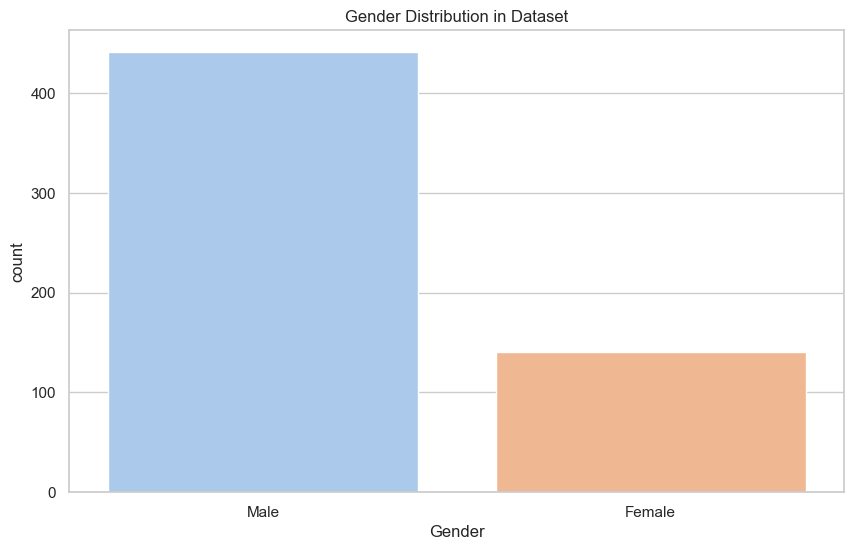

In [29]:
# 9️⃣ Gender Distribution

sns.countplot(x="Gender", hue="Gender", data=df, palette="pastel", legend=False)
plt.title("Gender Distribution in Dataset")
plt.show()

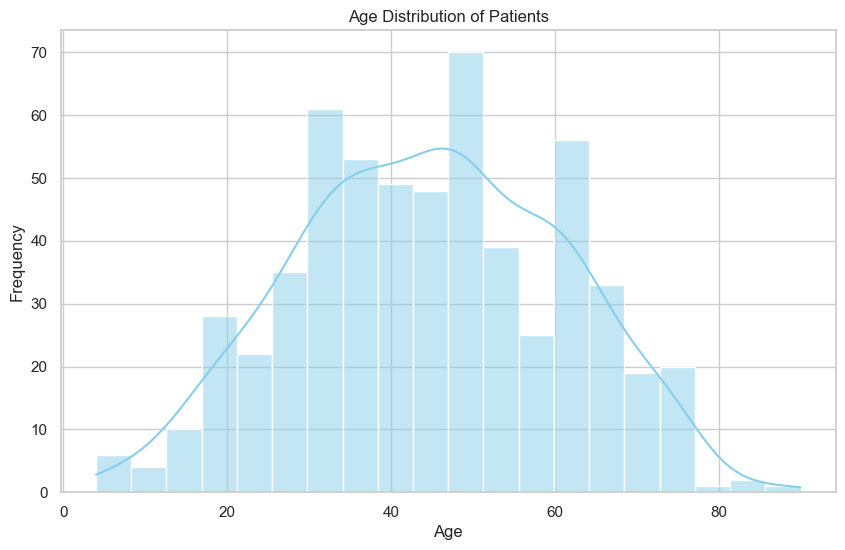

In [27]:
# 🔟 Age Distribution

sns.histplot(df["Age"], kde=True, bins=20, color="skyblue")
plt.title("Age Distribution of Patients")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

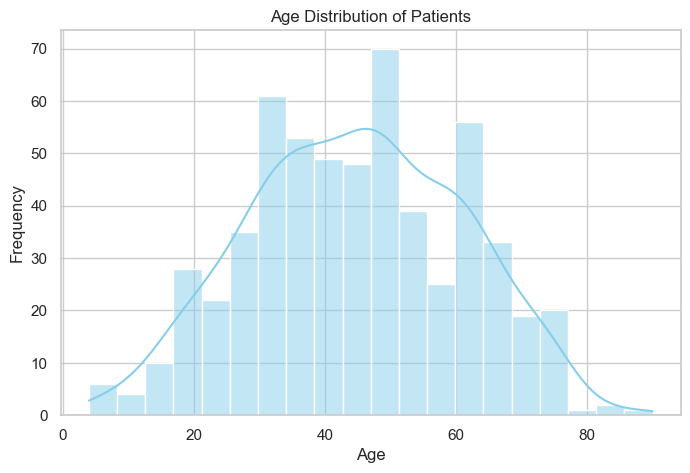

In [31]:
# 1️⃣1️⃣ Age Distribution
plt.figure(figsize=(8,5))
sns.histplot(df["Age"], bins=20, kde=True, color="skyblue")
plt.title("Age Distribution of Patients")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

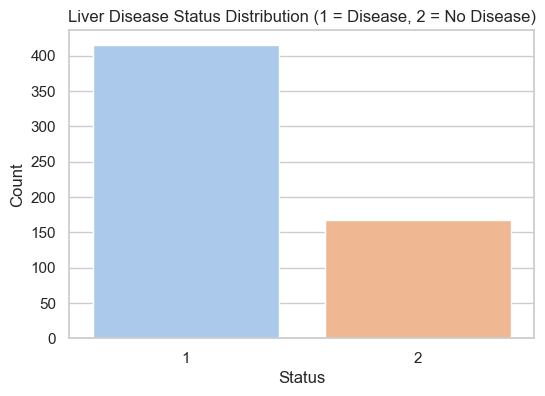

In [33]:
# 1️⃣2️⃣ Liver Disease Status Count
fig, ax = plt.subplots(figsize=(6,4))
ax = sns.countplot(data=df, x="Dataset", hue="Dataset", palette="pastel")
ax.set_title("Liver Disease Status Distribution (1 = Disease, 2 = No Disease)")
ax.set_xlabel("Status")
ax.set_ylabel("Count")
# Hide legend to avoid seaborn deprecation warning (palette without hue)
if ax.get_legend() is not None:
    ax.get_legend().remove()
plt.show()

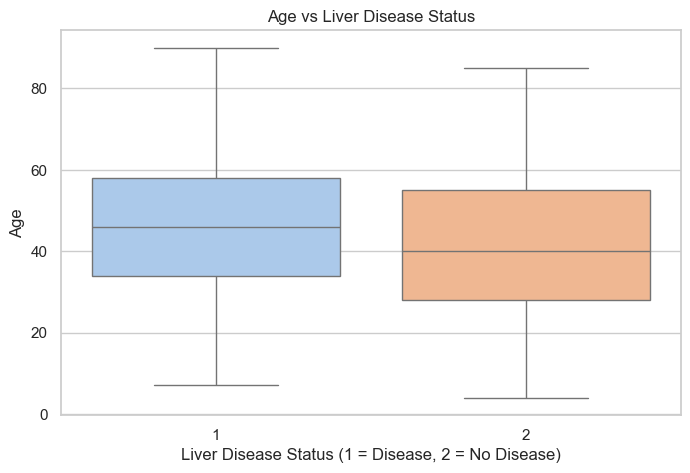

In [37]:
plt.figure(figsize=(8,5))
sns.boxplot(x="Dataset", y="Age", data=df, hue="Dataset", palette="pastel", legend=False)
plt.title("Age vs Liver Disease Status")
plt.xlabel("Liver Disease Status (1 = Disease, 2 = No Disease)")
plt.ylabel("Age")
plt.show()

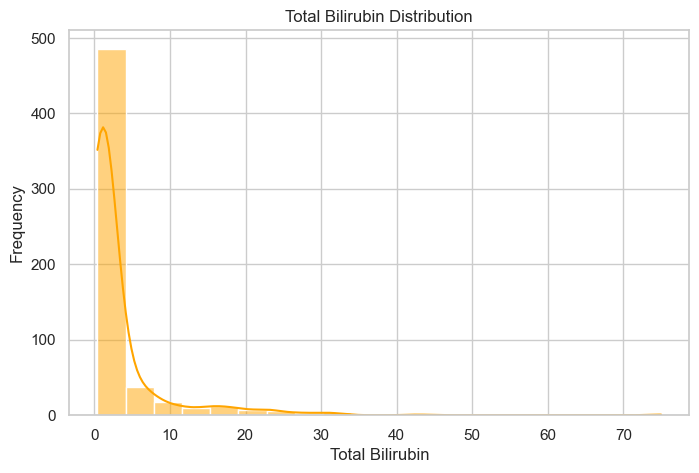

In [39]:
plt.figure(figsize=(8,5))
sns.histplot(df["Total_Bilirubin"], bins=20, kde=True, color="orange")
plt.title("Total Bilirubin Distribution")
plt.xlabel("Total Bilirubin")
plt.ylabel("Frequency")
plt.show()

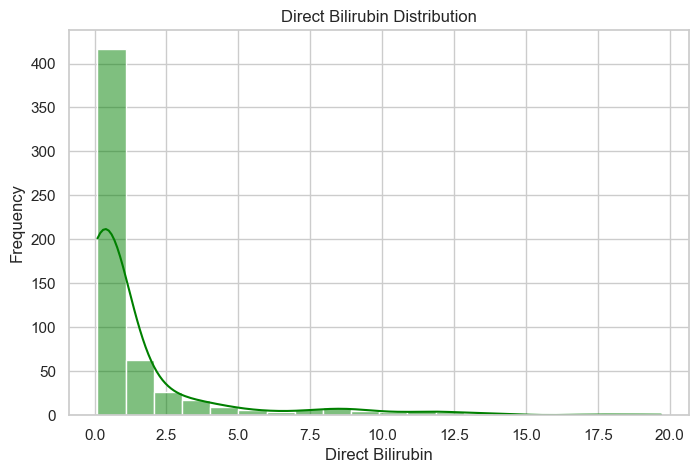

In [41]:
plt.figure(figsize=(8,5))
sns.histplot(df["Direct_Bilirubin"], bins=20, kde=True, color="green")
plt.title("Direct Bilirubin Distribution")
plt.xlabel("Direct Bilirubin")
plt.ylabel("Frequency")
plt.show()

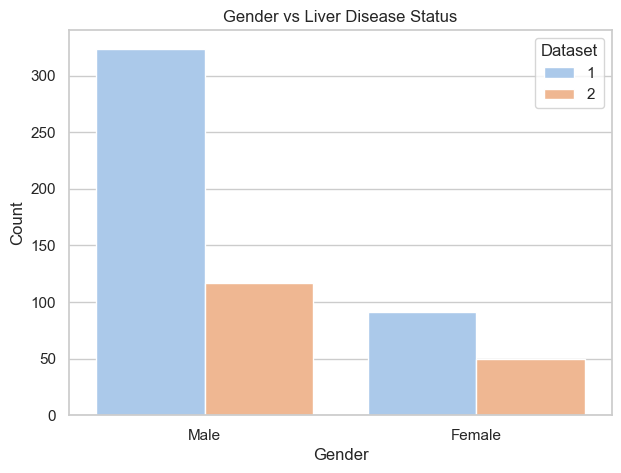

In [45]:
plt.figure(figsize=(7,5))
sns.countplot(x="Gender", hue="Dataset", data=df, palette="pastel")
plt.title("Gender vs Liver Disease Status")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

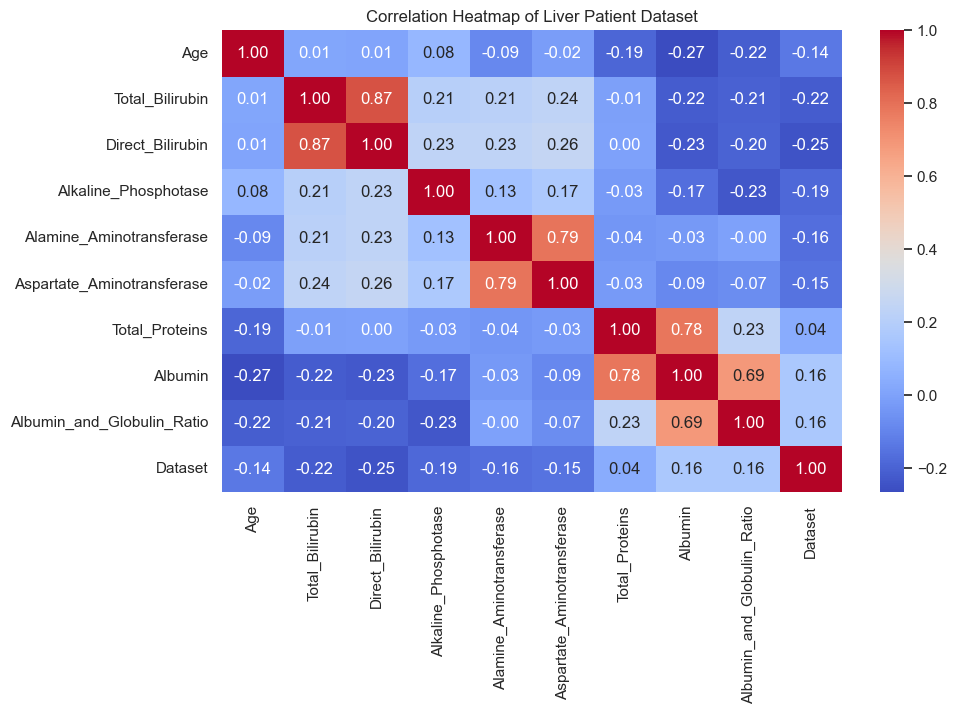

In [53]:
plt.figure(figsize=(10,6))

# Select only numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Calculate correlation
corr = numeric_df.corr()

# Plot heatmap
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Liver Patient Dataset")
plt.show()

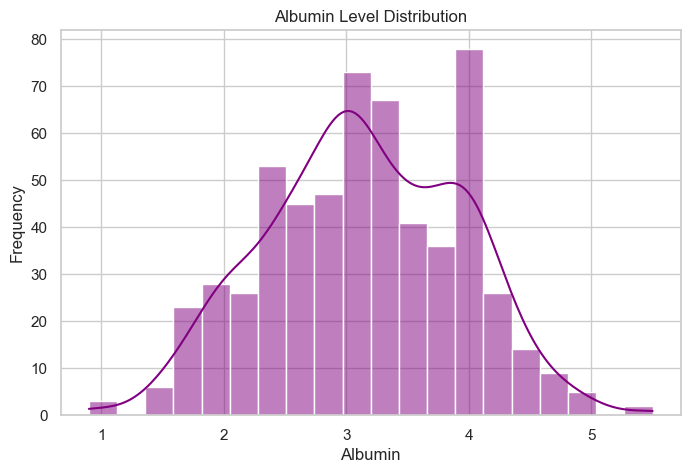

In [49]:
plt.figure(figsize=(8,5))
sns.histplot(df["Albumin"], bins=20, kde=True, color="purple")
plt.title("Albumin Level Distribution")
plt.xlabel("Albumin")
plt.ylabel("Frequency")
plt.show()

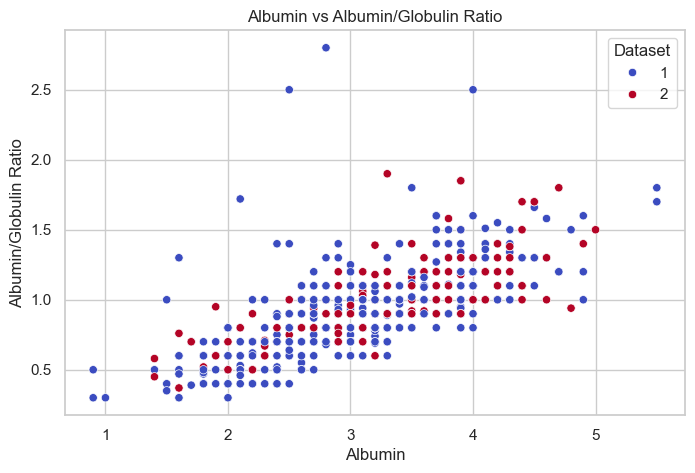

In [51]:
plt.figure(figsize=(8,5))
sns.scatterplot(x="Albumin", y="Albumin_and_Globulin_Ratio", data=df, hue="Dataset", palette="coolwarm")
plt.title("Albumin vs Albumin/Globulin Ratio")
plt.xlabel("Albumin")
plt.ylabel("Albumin/Globulin Ratio")
plt.show()

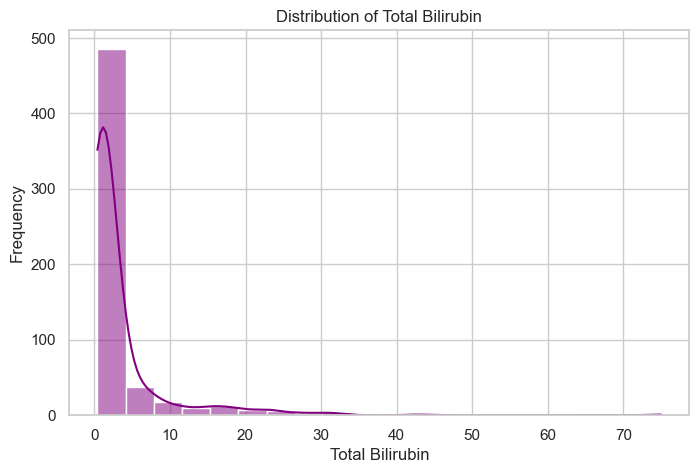

In [55]:
plt.figure(figsize=(8,5))
sns.histplot(df['Total_Bilirubin'], kde=True, color="purple", bins=20)
plt.title("Distribution of Total Bilirubin")
plt.xlabel("Total Bilirubin")
plt.ylabel("Frequency")
plt.show()

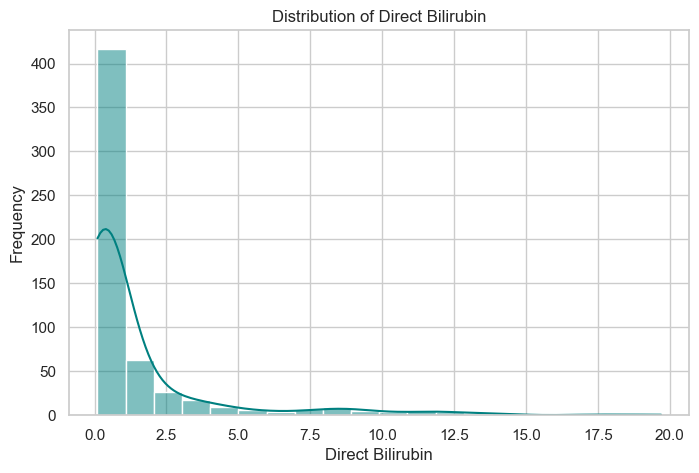

In [57]:
plt.figure(figsize=(8,5))
sns.histplot(df['Direct_Bilirubin'], kde=True, color="teal", bins=20)
plt.title("Distribution of Direct Bilirubin")
plt.xlabel("Direct Bilirubin")
plt.ylabel("Frequency")
plt.show()

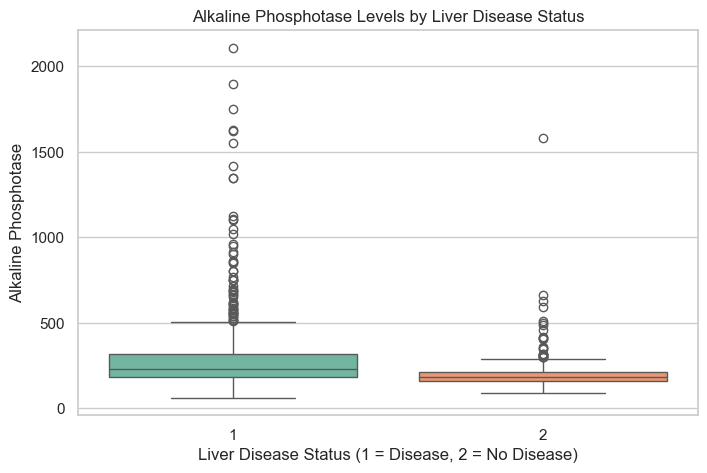

In [73]:
plt.figure(figsize=(8,5))
sns.boxplot(
    x="Dataset",
    y="Alkaline_Phosphotase",
    hue="Dataset",       # added hue
    data=df,
    palette="Set2",
    legend=False         # prevents duplicate legend
)
plt.title("Alkaline Phosphotase Levels by Liver Disease Status")
plt.xlabel("Liver Disease Status (1 = Disease, 2 = No Disease)")
plt.ylabel("Alkaline Phosphotase")
plt.show()

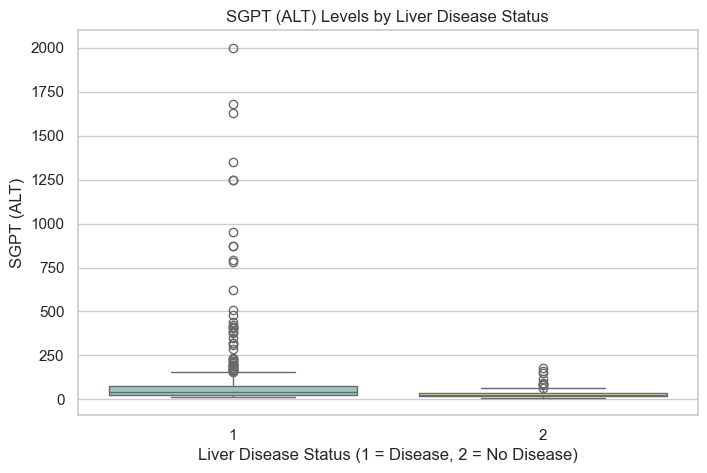

In [75]:
plt.figure(figsize=(8,5))
sns.boxplot(
    x="Dataset",
    y="Alamine_Aminotransferase",  # actual column name
    data=df,
    hue="Dataset",
    palette="Set3",
    legend=False
)
plt.title("SGPT (ALT) Levels by Liver Disease Status")
plt.xlabel("Liver Disease Status (1 = Disease, 2 = No Disease)")
plt.ylabel("SGPT (ALT)")
plt.show()

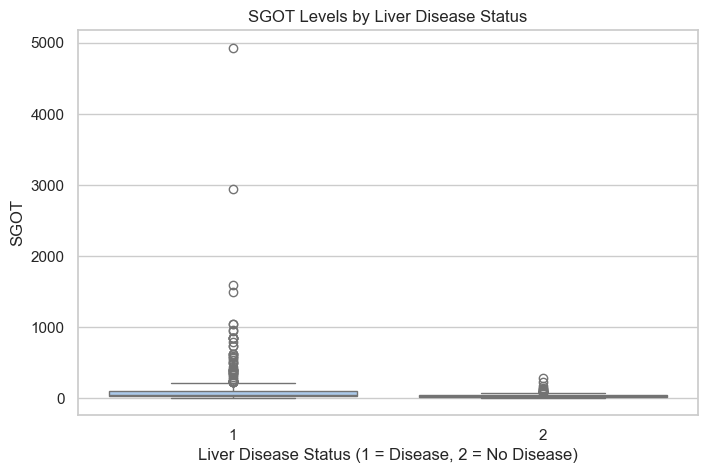

In [71]:
plt.figure(figsize=(8,5))
sns.boxplot(
    x="Dataset", 
    y="Aspartate_Aminotransferase", 
    hue="Dataset",  # added hue
    data=df, 
    palette="pastel",
    legend=False     # removes duplicate legend
)
plt.title("SGOT Levels by Liver Disease Status")
plt.xlabel("Liver Disease Status (1 = Disease, 2 = No Disease)")
plt.ylabel("SGOT")
plt.show()

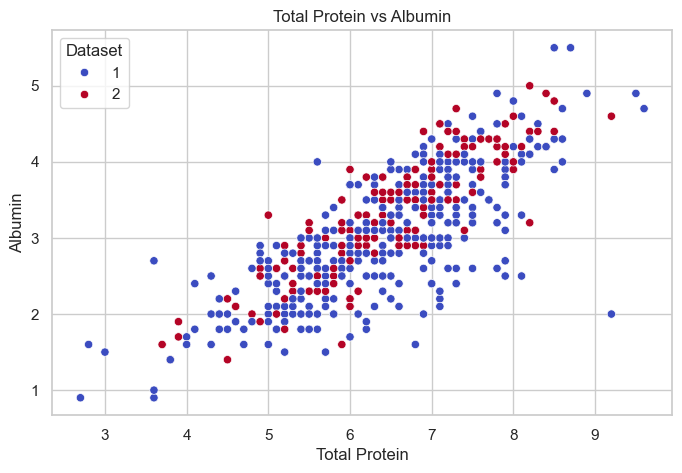

In [67]:
plt.figure(figsize=(8,5))
sns.scatterplot(x="Total_Proteins", y="Albumin", data=df, hue="Dataset", palette="coolwarm")
plt.title("Total Protein vs Albumin")
plt.xlabel("Total Protein")
plt.ylabel("Albumin")
plt.show()

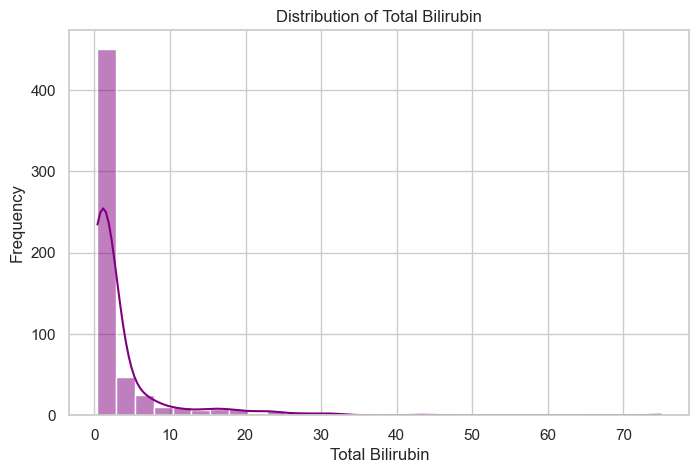

In [77]:
# Distribution of Total Bilirubin
plt.figure(figsize=(8,5))
sns.histplot(df["Total_Bilirubin"], bins=30, kde=True, color="purple")
plt.title("Distribution of Total Bilirubin")
plt.xlabel("Total Bilirubin")
plt.ylabel("Frequency")
plt.show()

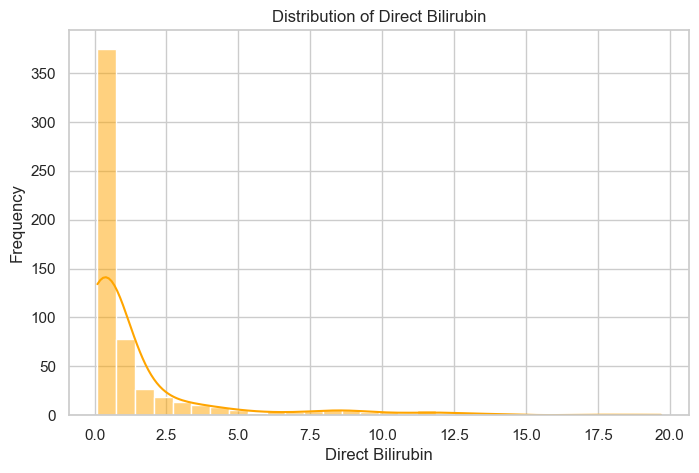

In [79]:
# 1️⃣ Direct Bilirubin Distribution
plt.figure(figsize=(8,5))
sns.histplot(df["Direct_Bilirubin"], bins=30, kde=True, color="orange")
plt.title("Distribution of Direct Bilirubin")
plt.xlabel("Direct Bilirubin")
plt.ylabel("Frequency")
plt.show()

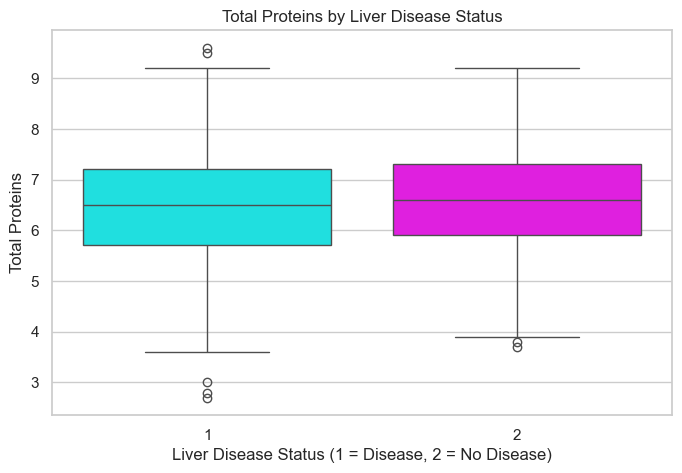

In [91]:
# 2️⃣ Total Proteins by Liver Disease Status (Fixed)
plt.figure(figsize=(8,5))
sns.boxplot(x="Dataset", y="Total_Proteins", data=df, hue="Dataset", palette="cool")
plt.title("Total Proteins by Liver Disease Status")
plt.xlabel("Liver Disease Status (1 = Disease, 2 = No Disease)")
plt.ylabel("Total Proteins")
plt.legend([],[], frameon=False)
plt.show()

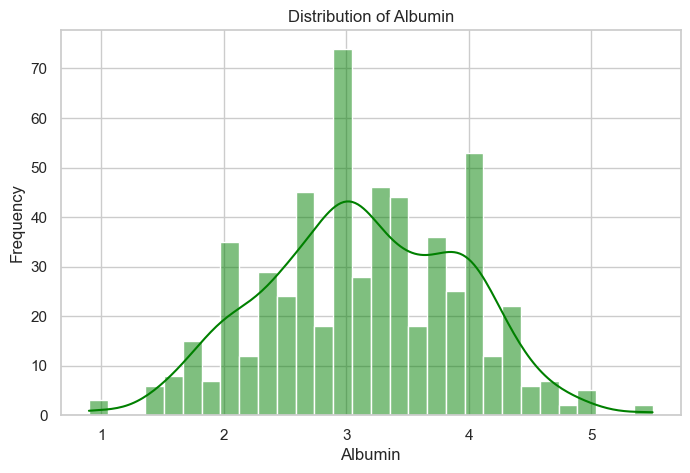

In [83]:
# 3️⃣ Albumin Levels Distribution
plt.figure(figsize=(8,5))
sns.histplot(df["Albumin"], bins=30, kde=True, color="green")
plt.title("Distribution of Albumin")
plt.xlabel("Albumin")
plt.ylabel("Frequency")
plt.show()

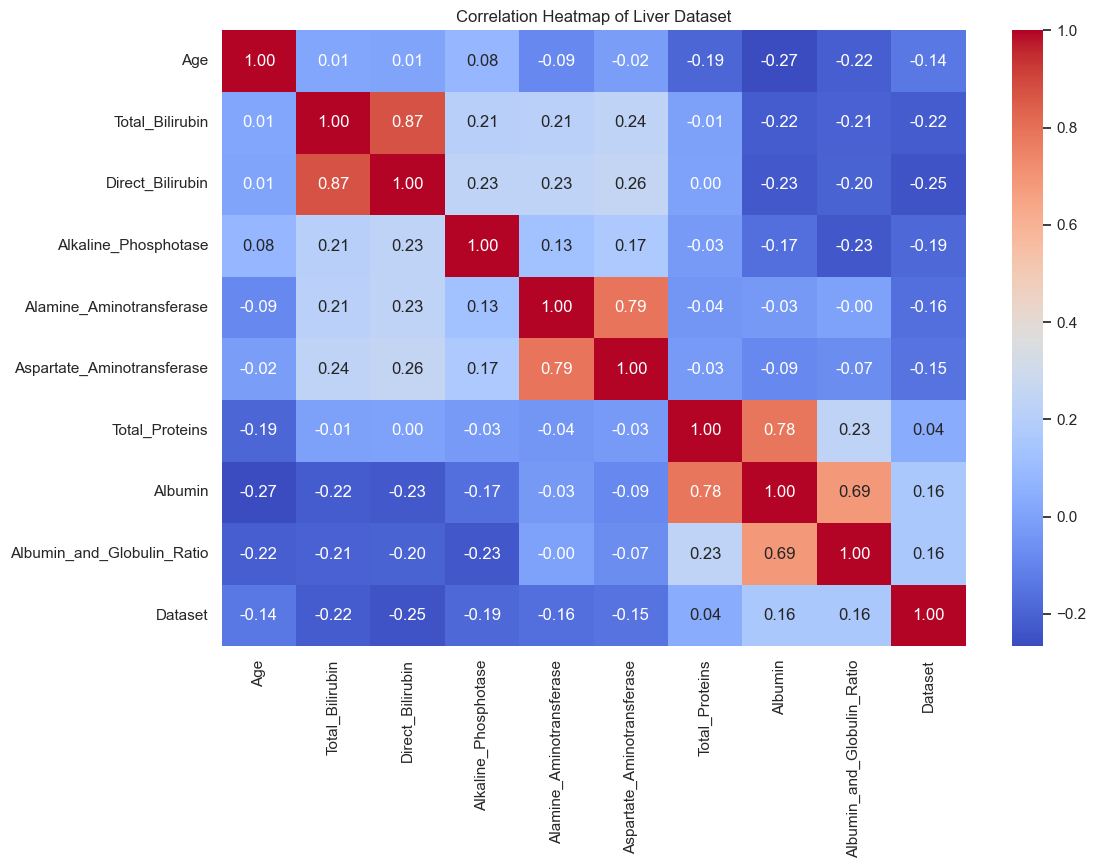

In [89]:
# 4️⃣ Correlation Heatmap (Fixed)
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Liver Dataset")
plt.show()

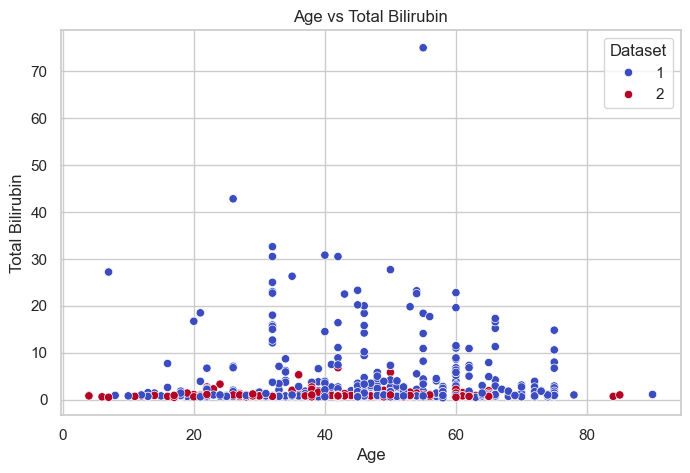

In [87]:
# 5️⃣ Scatter Plot: Age vs Total Bilirubin
plt.figure(figsize=(8,5))
sns.scatterplot(x="Age", y="Total_Bilirubin", data=df, hue="Dataset", palette="coolwarm")
plt.title("Age vs Total Bilirubin")
plt.xlabel("Age")
plt.ylabel("Total Bilirubin")
plt.show()

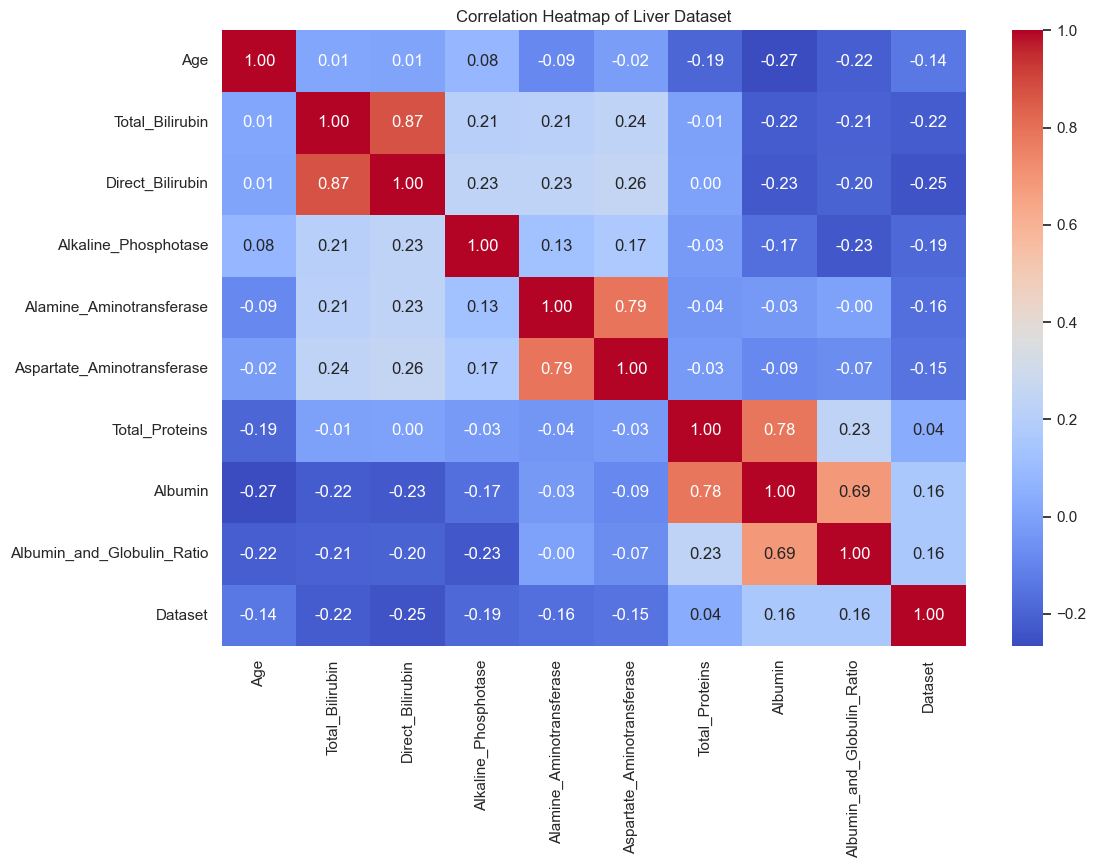

In [93]:
# Correlation Heatmap (numeric columns only)
plt.figure(figsize=(12,8))
sns.heatmap(df.select_dtypes(include=["number"]).corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Liver Dataset")
plt.show()

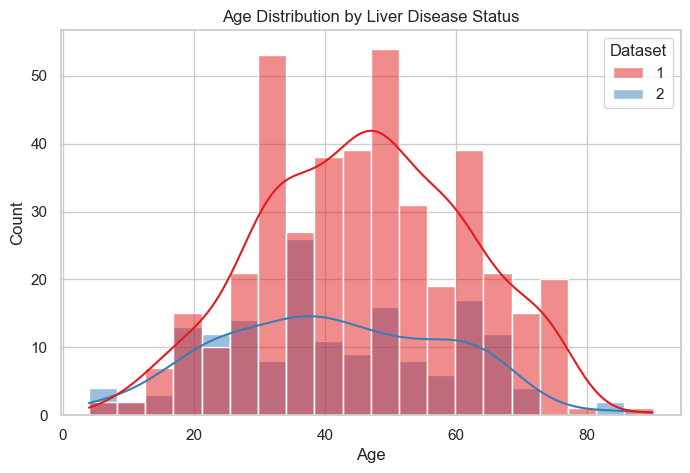

In [95]:
# Age Distribution
plt.figure(figsize=(8,5))
sns.histplot(data=df, x="Age", hue="Dataset", kde=True, palette="Set1", bins=20)
plt.title("Age Distribution by Liver Disease Status")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

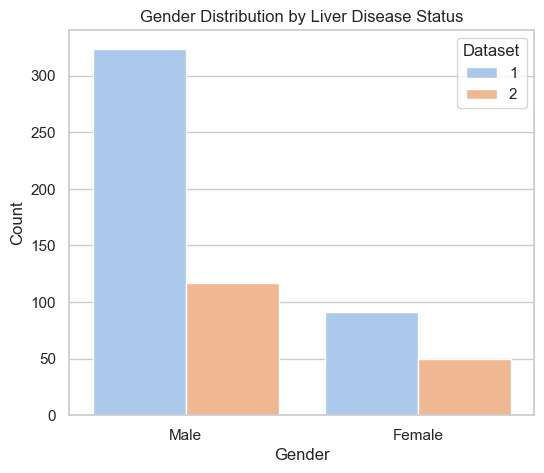

In [97]:
# Gender vs Liver Disease
plt.figure(figsize=(6,5))
sns.countplot(x="Gender", hue="Dataset", data=df, palette="pastel")
plt.title("Gender Distribution by Liver Disease Status")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

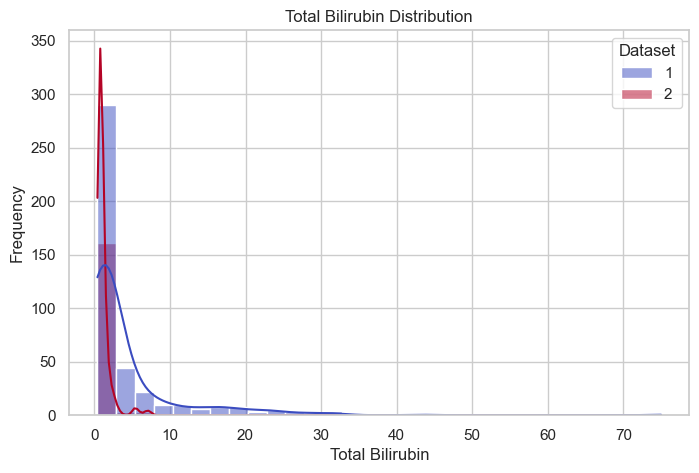

In [99]:
# Total Bilirubin Distribution
plt.figure(figsize=(8,5))
sns.histplot(data=df, x="Total_Bilirubin", hue="Dataset", kde=True, bins=30, palette="coolwarm")
plt.title("Total Bilirubin Distribution")
plt.xlabel("Total Bilirubin")
plt.ylabel("Frequency")
plt.show()

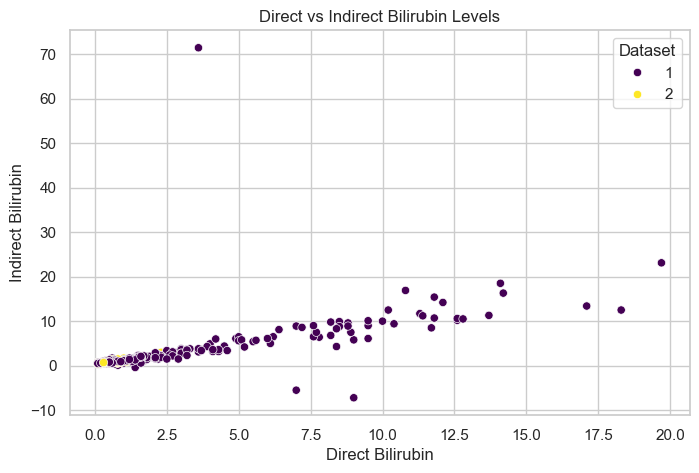

In [101]:
# Direct vs Indirect Bilirubin
plt.figure(figsize=(8,5))
sns.scatterplot(x="Direct_Bilirubin", y=df["Total_Bilirubin"] - df["Direct_Bilirubin"], data=df, hue="Dataset", palette="viridis")
plt.title("Direct vs Indirect Bilirubin Levels")
plt.xlabel("Direct Bilirubin")
plt.ylabel("Indirect Bilirubin")
plt.show()

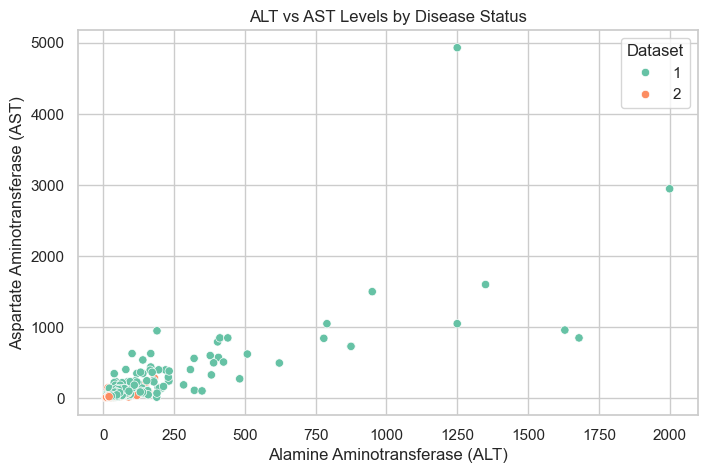

In [103]:
# ALT vs AST Levels
plt.figure(figsize=(8,5))
sns.scatterplot(x="Alamine_Aminotransferase", y="Aspartate_Aminotransferase", 
                hue="Dataset", data=df, palette="Set2")
plt.title("ALT vs AST Levels by Disease Status")
plt.xlabel("Alamine Aminotransferase (ALT)")
plt.ylabel("Aspartate Aminotransferase (AST)")
plt.show()

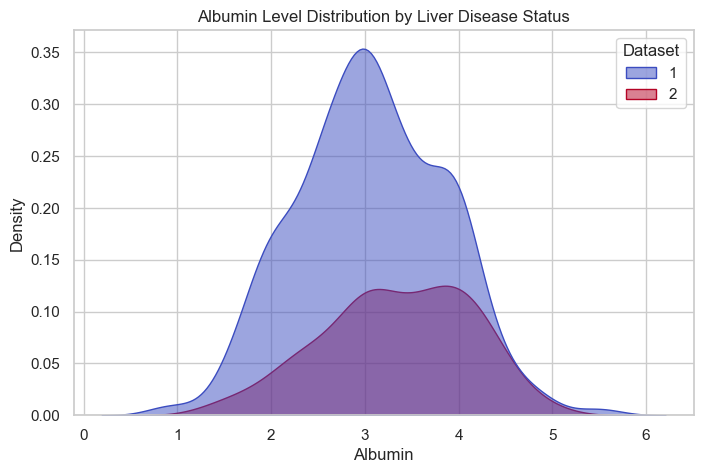

In [105]:
# Albumin Distribution
plt.figure(figsize=(8,5))
sns.kdeplot(data=df, x="Albumin", hue="Dataset", fill=True, palette="coolwarm", alpha=0.5)
plt.title("Albumin Level Distribution by Liver Disease Status")
plt.xlabel("Albumin")
plt.ylabel("Density")
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_16204\2763825600.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Dataset", y="Albumin_and_Globulin_Ratio", data=df, palette="pastel")


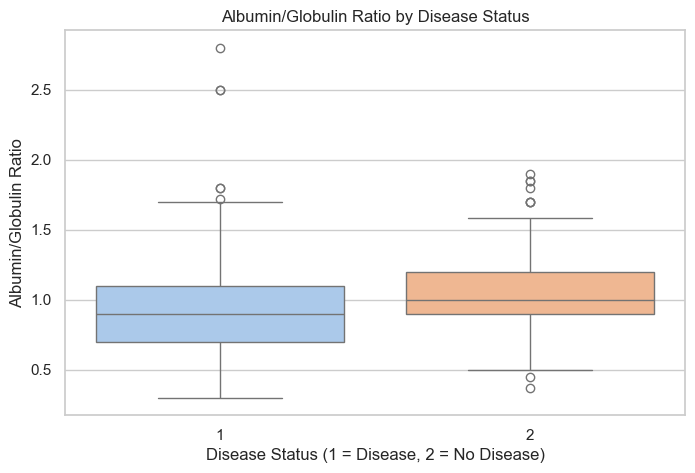

In [107]:
# Albumin/Globulin Ratio Boxplot
plt.figure(figsize=(8,5))
sns.boxplot(x="Dataset", y="Albumin_and_Globulin_Ratio", data=df, palette="pastel")
plt.title("Albumin/Globulin Ratio by Disease Status")
plt.xlabel("Disease Status (1 = Disease, 2 = No Disease)")
plt.ylabel("Albumin/Globulin Ratio")
plt.show()

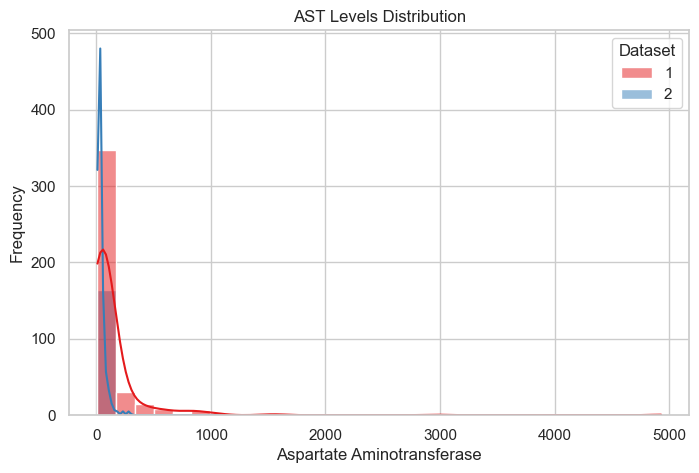

In [111]:
# AST Distribution
plt.figure(figsize=(8,5))
sns.histplot(data=df, x="Aspartate_Aminotransferase", hue="Dataset", kde=True, bins=30, palette="Set1")
plt.title("AST Levels Distribution")
plt.xlabel("Aspartate Aminotransferase")
plt.ylabel("Frequency")
plt.show()

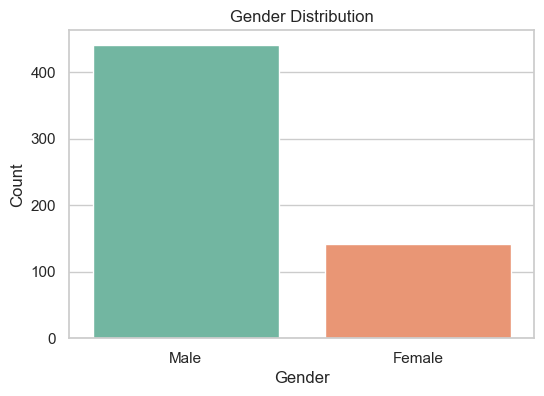

In [115]:
# Gender Distribution (future-proof)
plt.figure(figsize=(6,4))
sns.countplot(x="Gender", hue="Gender", data=df, palette="Set2", legend=False)
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

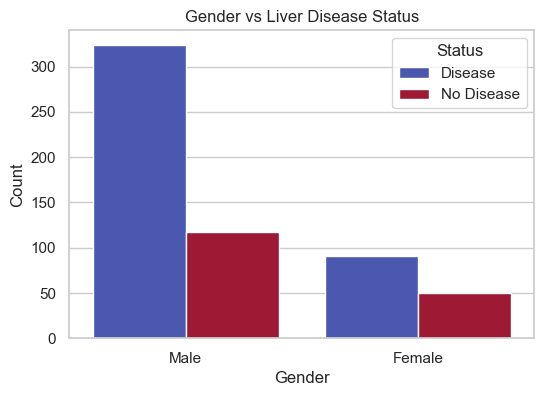

In [117]:
# Gender vs Liver Disease
plt.figure(figsize=(6,4))
sns.countplot(x="Gender", hue="Dataset", data=df, palette="coolwarm")
plt.title("Gender vs Liver Disease Status")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.legend(title="Status", labels=["Disease", "No Disease"])
plt.show()

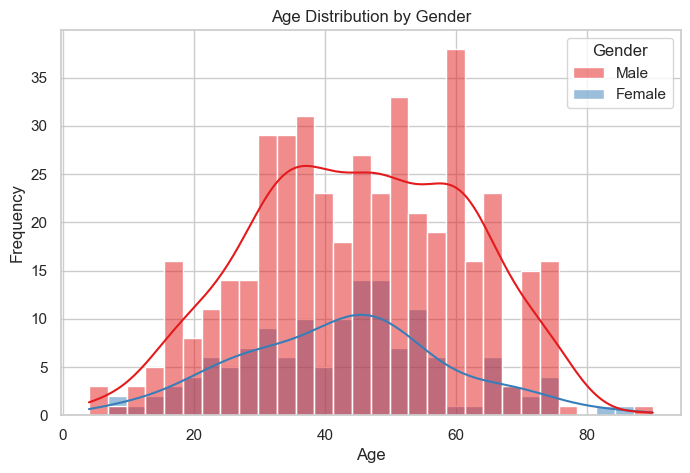

In [119]:
# Age Distribution by Gender
plt.figure(figsize=(8,5))
sns.histplot(data=df, x="Age", hue="Gender", bins=30, kde=True, palette="Set1")
plt.title("Age Distribution by Gender")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

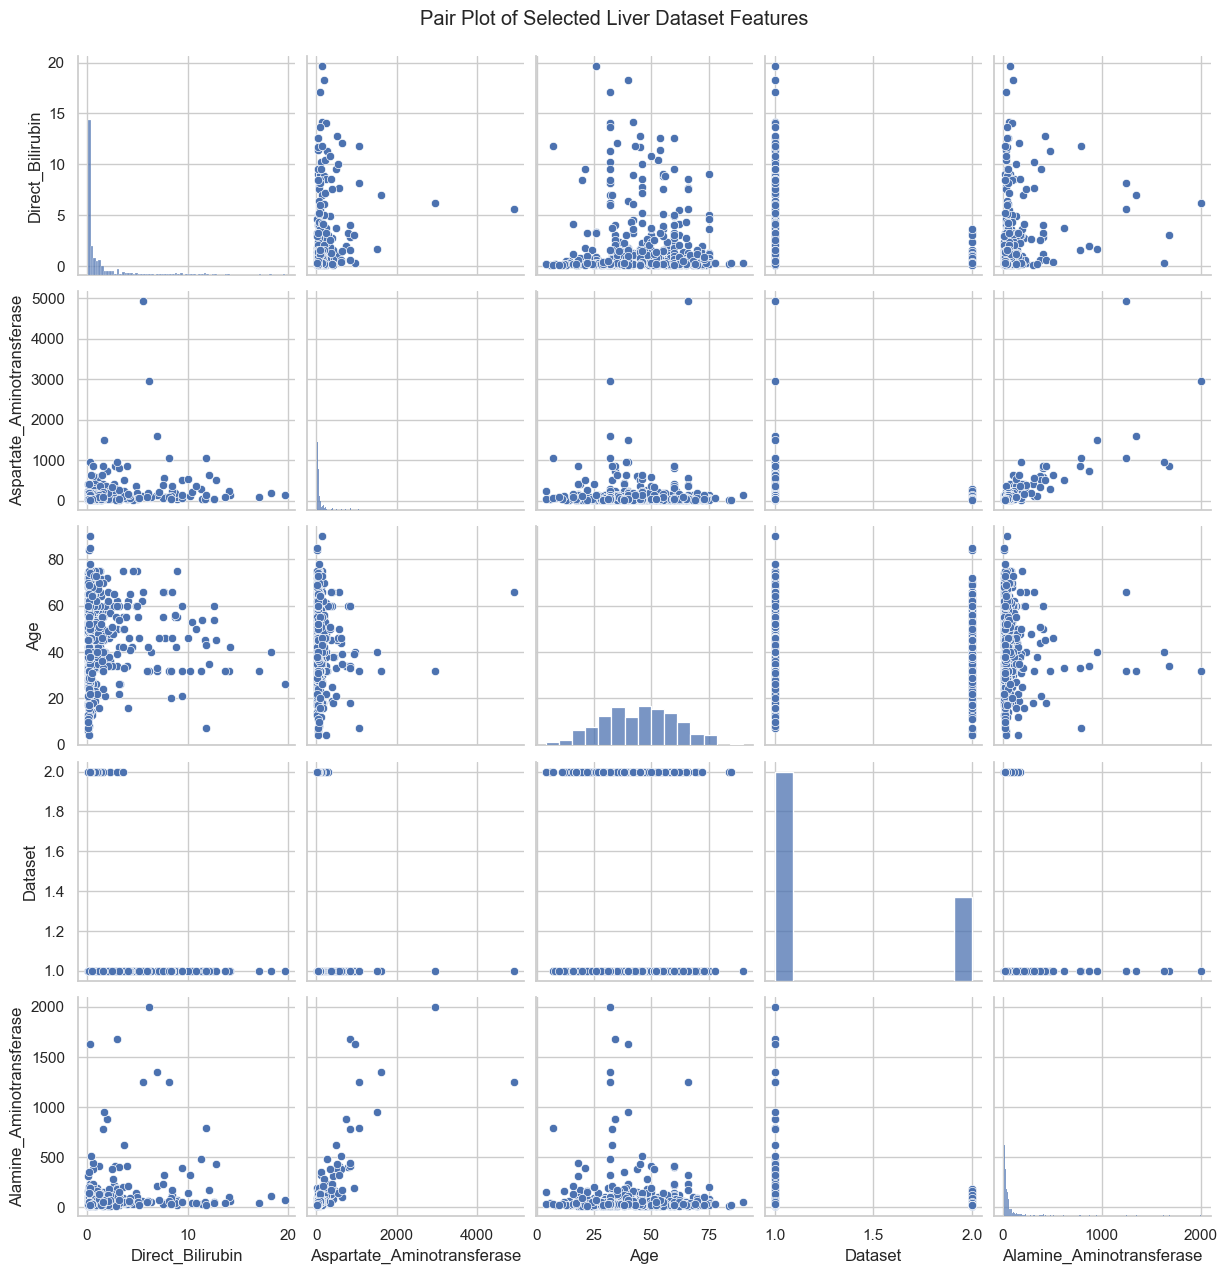

In [121]:
# Pair Plot (only numeric columns to avoid errors)
numeric_cols = df.select_dtypes(include=["float64", "int64"])
sns.pairplot(numeric_cols.sample(n=min(5, numeric_cols.shape[1]), axis=1))  # sample up to 5 cols
plt.suptitle("Pair Plot of Selected Liver Dataset Features", y=1.02)
plt.show()

## 📝 Conclusion

In this task, we performed **Exploratory Data Analysis (EDA)** on the Liver Patient Dataset to better understand its structure, relationships, and key patterns.  

Here’s what we accomplished:  
- **Data Inspection & Cleaning**  
  - Checked dataset structure, columns, and data types.  
  - Identified missing values and handled them appropriately.  
  - Ensured categorical values were properly encoded for analysis.  

- **Univariate Analysis**  
  - Plotted histograms and distribution plots for key numerical features (e.g., Age, Total Bilirubin, Albumin, Enzymes).  
  - Created count plots for categorical features like Gender and Dataset classification.  

- **Bivariate & Multivariate Analysis**  
  - Scatter plots to explore relationships between important clinical variables (e.g., Albumin vs. Albumin/Globulin Ratio).  
  - Boxplots to visualize spread and detect outliers.  
  - Grouped bar charts for comparing distributions across categories.  

- **Correlation Analysis**  
  - Generated a correlation heatmap to identify strongly related features and possible multicollinearity.  

- **Insights**  
  - Certain liver enzyme levels (SGOT, SGPT, Alkphos) show clear differences between patient classes.  
  - Albumin and the Albumin/Globulin Ratio appear to be strong indicators for classification.  
  - Some features are highly correlated, which may influence model selection and feature engineering later.

Overall, the EDA process provided a **clearer understanding of the dataset**, helped uncover patterns, and laid the groundwork for the next steps in **data preprocessing and model building**.
